## Importar librerias

In [2]:
### Importar librerias
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Importar archivo .CSV

In [3]:
### Importamos dataset de valuación de jugadores de futbol
### https://www.kaggle.com/datasets/davidcariboo/player-scores
df = pd.read_csv('player_valuations.csv')

In [4]:
df

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
495502,1196380,2025-03-20,75000,152,TR1
495503,1201294,2025-03-20,150000,3840,TR1
495504,1201580,2025-03-20,50000,6890,TR1
495505,1210233,2025-03-20,125000,7160,TR1


In [5]:
### Cambiamos el nombre de las columnas de Ingles a Español
df.rename(columns = {'market_value_in_eur': 'precio_en_euros'}, inplace = True)

In [6]:
df_sorted = df.sort_values(by = 'precio_en_euros', ascending = False)

df_sorted

,player_id,date,precio_en_euros,current_club_id,player_club_domestic_competition_id
494277,371998,2024-12-27,200000000,418,ES1
269419,342229,2019-06-03,200000000,418,ES1
486845,418560,2024-10-01,200000000,281,GB1
487985,371998,2024-10-11,200000000,418,ES1
490618,418560,2024-12-16,200000000,281,GB1
...,...,...,...,...,...
481045,966488,2024-06-03,10000,126,TR1
61801,177032,2011-10-15,10000,11282,TR1
61798,170238,2011-10-15,10000,2381,TR1
454984,260781,2023-06-27,10000,252,IT1


## Estadística descriptiva

### 1. Resumén estadístico básico

In [7]:
# Configurar el formato de visualización para mostrar números completos
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

,player_id,precio_en_euros,current_club_id
count,495507.000,495507.000,495507.000
mean,223654.011,2457850.329,4432.040
std,206193.851,6956909.917,10942.534
min,10.000,0.000,3.000
25%,58930.000,200000.000,369.000
50%,164504.000,500000.000,1025.000
75%,333117.000,1700000.000,2995.000
max,1306851.000,200000000.000,110302.000


In [8]:
### Funciones de Pandas
df['precio_en_euros'].mean()

np.float64(2457850.3290548874)

In [9]:
df['precio_en_euros'].median()

np.float64(500000.0)

In [10]:
df['precio_en_euros'].mode()

0    300000
Name: precio_en_euros, dtype: int64

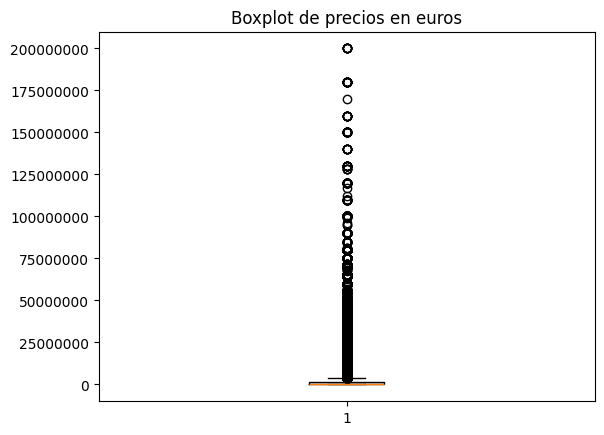

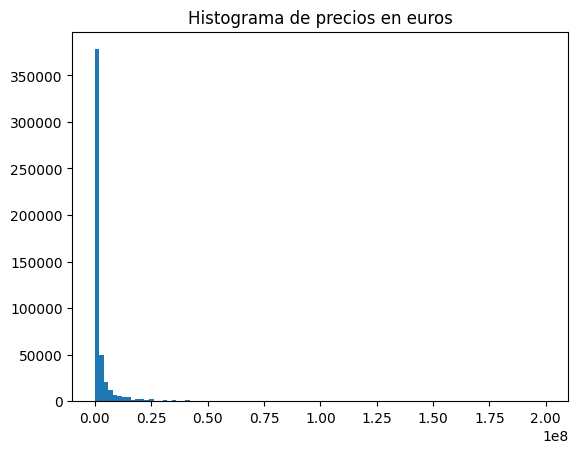

In [11]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style = 'plain', axis = 'y')

# Boxplot con matplotlib
plt.boxplot(df['precio_en_euros'])
plt.title('Boxplot de precios en euros')
plt.show()

# Histograma con matplotlib
plt.hist(df['precio_en_euros'], bins = 100) # Puedes ajustar el número de bins según tus preferencias
plt.title('Histograma de precios en euros')
plt.show()

**Limpieza de datos utilizando el IQR**

Este proceso está relacionado con la identificación y tratamiento de outliers en un conjunto de datos. Aquí hay una explicación detallada paso a paso:
1. Cálculo de los Cuartiles (Q1, Q3):
    - Q1 representa el primer cuartil, que es el valor del cual se encuentra el 25% de los datos.
    - Q3 representa el tercer cuartil, que es el valor por debajo del cual se encuentra el 75% de los datos.
    - Estos cuartiles dividen el conjunto de datos en cuatro partes iguales.
2. Cálculo del Rango Intercuartílico (IQR):
    - El rango intercuartílico es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1).
    - Matemáticamente: IQR = Q3 - Q1.
3. Definición de Límites para Outliers:
    Se establecen límites superior e inferior para identificar valores atípicos en los datos:
    - Límite inferior: Q1 - 1.5 × IQR.
    - Límite superior: Q3 + 1.5 × IQR.
4. Identificación de Outliers:
    - Cualquier valor en el conjunto de datos que sea menor que el límite inferior o mayor que el límite superior se considera un outlier.

Este enfoque, basado en el rango intercuartílico y los límites establecidos, es una técnica común para identificar y manejar valores atípicos en un conjunto de datos. La idea es que los valores atípicos están más allá de ciertos límites estadísticos y pueden ser tratados de manera especial según los requisitos del análisis.


In [12]:
## Calcular el rango intercuartílico (IQR)
Q1 = df['precio_en_euros'].quantile(0.25)
Q3 = df['precio_en_euros'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior, para definir outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores que están dentro del rango
df_filtered = df[(df['precio_en_euros'] >= lower_bound) & (df['precio_en_euros'] <= upper_bound)]

In [13]:
df_filtered

,player_id,date,precio_en_euros,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
5,26,2004-10-04,1500000,16,L1
...,...,...,...,...,...
495502,1196380,2025-03-20,75000,152,TR1
495503,1201294,2025-03-20,150000,3840,TR1
495504,1201580,2025-03-20,50000,6890,TR1
495505,1210233,2025-03-20,125000,7160,TR1


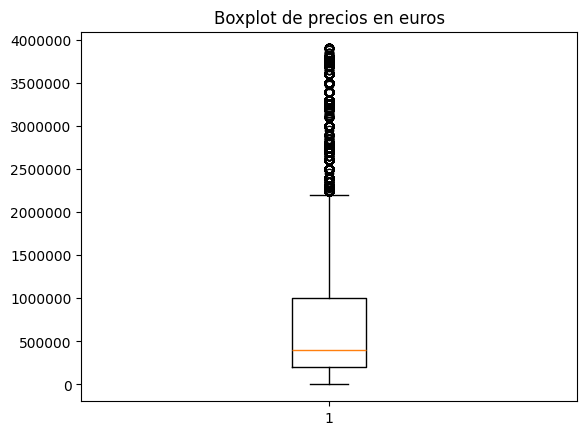

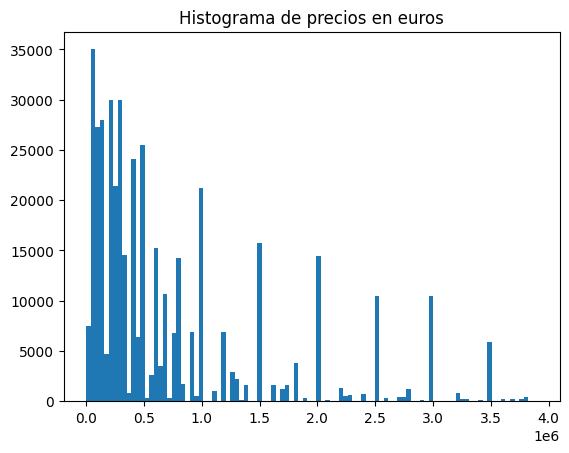

In [14]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style = 'plain', axis = 'y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['precio_en_euros'])
plt.title('Boxplot de precios en euros')
plt.show()

# Histograma con matplotlib
plt.hist(df_filtered['precio_en_euros'], bins = 100) # Puedes ajustar el número de bins según tus preferencias
plt.title('Histograma de precios en euros')
plt.show()

### 2. Medidas de dispersión

In [15]:
### Rango
rango = df_filtered['precio_en_euros'].max() - df_filtered['precio_en_euros'].min()

In [17]:
rango

np.int64(3900000)

Varianza:
    
    - La varianza es una medida de la dispersión o extensión de un conjunto de datos.
    - indica cuánto se alejan los valores individuales del valor medio (promedio) del conjunto.
    - Si los datos están muy dispersos, la varianza será alta; si están agrupados alrededor de la media, la varianza será baja.
    - Se calcula sumando los cuadrados de las diferencias entre cada valor y la media, y luego dividiendo por el número total de valores.

In [16]:
### Varianza
df_filtered['precio_en_euros'].var()

np.float64(657460109516.4391)

Desviación Estándar:

    - La desviación estándar es simplemente la raíz cuadrada de la varianza.
    - Proporciona una medida de dispersión en la misma escala que los datos orginales.
    - Es una medida más fácil de interpretar porque está en las mismas unidaddes que los datos.
    - Si la desviación estándar es pequeña, significa que los datos tienden a estar cerca del promedio; si es grande, significa que los datos están más dispersos.

In [18]:
df_filtered['precio_en_euros'].std()

np.float64(810839.139112339)

### 3. Correlación

La correlación entre dos variables es una medida estadística y la dependencia entre ellas. En otras palabras, la correlación indica cómo cambia una variable en relación con la otra.

La correlación mide la relación lineal entre dos variables. El coeficiente de correlación varía entre -1 y 1.

    - Si es 1, significa una correlación positiva perfecta.
    - Si es -1, indica una correlación negativa perfecta.
    - Si es 0, no hay correlación lineal.

In [19]:
# Creamos un nuevo dataframe solo con variables númericas para poder calcular la correlación
df_nuevo = df[['precio_en_euros', 'current_club_id']].copy()

In [20]:
df_nuevo

,precio_en_euros,current_club_id
0,150000,3057
1,100000,1241
2,400000,126
3,900000,984
4,7000000,398
...,...,...
495502,75000,152
495503,150000,3840
495504,50000,6890
495505,125000,7160


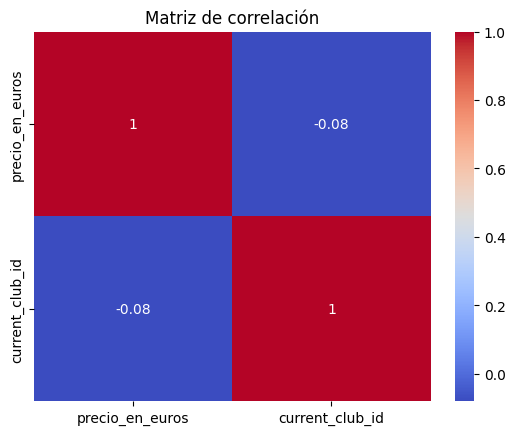

In [21]:
# Cálculo de la matriz de correlación
correlation_matrix = df_nuevo.corr()

# Visualización del heatmap con Seaborn
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### 4. Diagrama de dispersión

Un Diagrama de dispersión, también conocido como gráfico de dispersión o scatter en inglés, es una representación visual de la relación entre dos variables. Cada punto en el diagrama de dispersión representa un par de valores (uno para cada variable) y se coloca en un sistema de coordenadas cartesianas, donde una variable se representa en el eje x (horizontal) y la otra en el eje y (vertical):

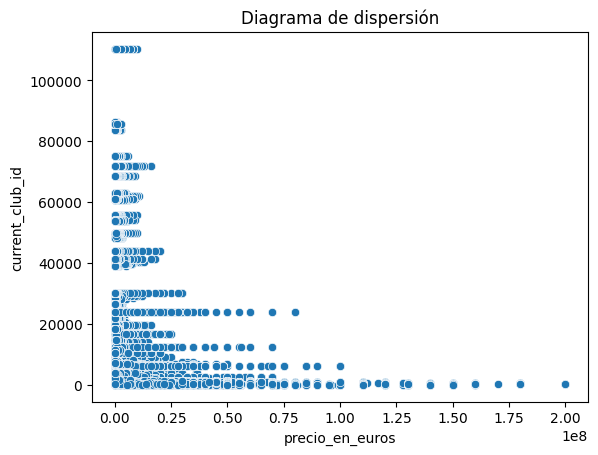

In [22]:
# Diagrama de dispersión con Seaborn
sns.scatterplot(x = 'precio_en_euros', y = 'current_club_id', data = df_nuevo)
plt.title('Diagrama de dispersión')
plt.show()

### 5. Repetimos los puntos 3 y 4 con un dataset en dónde seguro vamos a encontrar correlación entre variables.

In [23]:
### Importamos dataset de valuación de jugadores de fútbol
df_houses = pd.read_csv('kc_house_data.csv')

In [24]:
### Mostramos las primeras 5 filas del dataset
df_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


In [27]:
# Creamos un nuevo dataframe con las variable númericas que nos interesan
df_houses_corr = df_houses[['price','bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors']].copy()

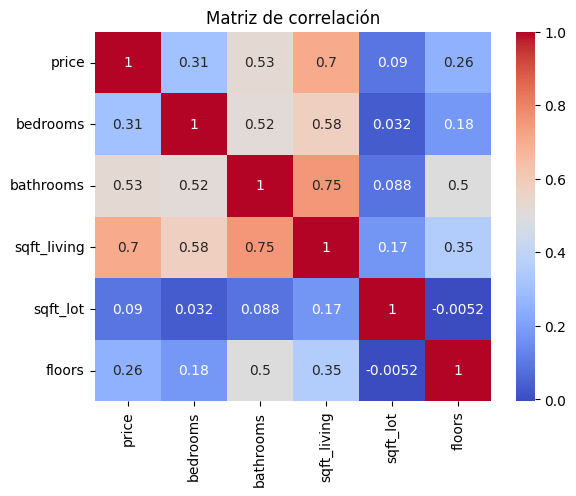

In [29]:
# Cálculo de la matriz de correlación
correlation_matrix = df_houses_corr.corr()

# Visualización del heatmap con Seaborn
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

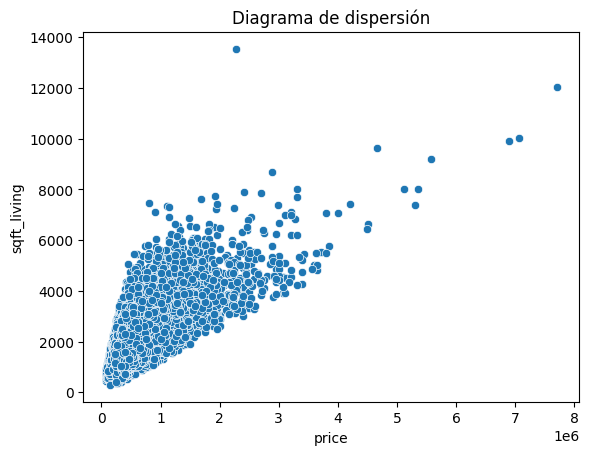

In [30]:
### Diagrama de dispersión con Seaborn
### El diagrama de dispersión nos permite visualizar la relación entre dos variables. Se puede usar para identificar patrones y tendencias.
sns.scatterplot(x = 'price', y = 'sqft_living', data = df_houses_corr)
plt.title('Diagrama de dispersión')
plt.show()